Lecture: AI I - Basics 

Previous:
[**Chapter 4.2: Machine Learning with scikit-learn**](../02_machine_learning.ipynb)

---

# Exercise 4.2: Machine Learning with scikit-learn

- [Task 1: Random Forest Classification](#task-1-random-forest-classification)
- [Task 2: Support Vector Machine](#task-2-support-vector-machine)
- [Task 3: K-Means Clustering](#task-3-k-means-clustering)

> Hint: When doing the exercises put your solution in the designated "Solution" section:
> ```python
> # Solution (put your code here)
> ```

## Task 1: Random Forest Classification

Train a RandomForestClassifier with 100 estimators on the Breast Cancer dataset and achieve >90% accuracy. name the model `rf_model`.

In [1]:
# prerequisites (don't edit this block)
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# load breast cancer dataset and split into training and test sets
cancer = datasets.load_breast_cancer()
X_cancer, y_cancer = cancer.data, cancer.target
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(
    X_cancer, y_cancer, test_size=0.3, random_state=42
)

In [ ]:
# Solution (put your code here)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


✓ Task 1 Complete - Random Forest accuracy: 0.965


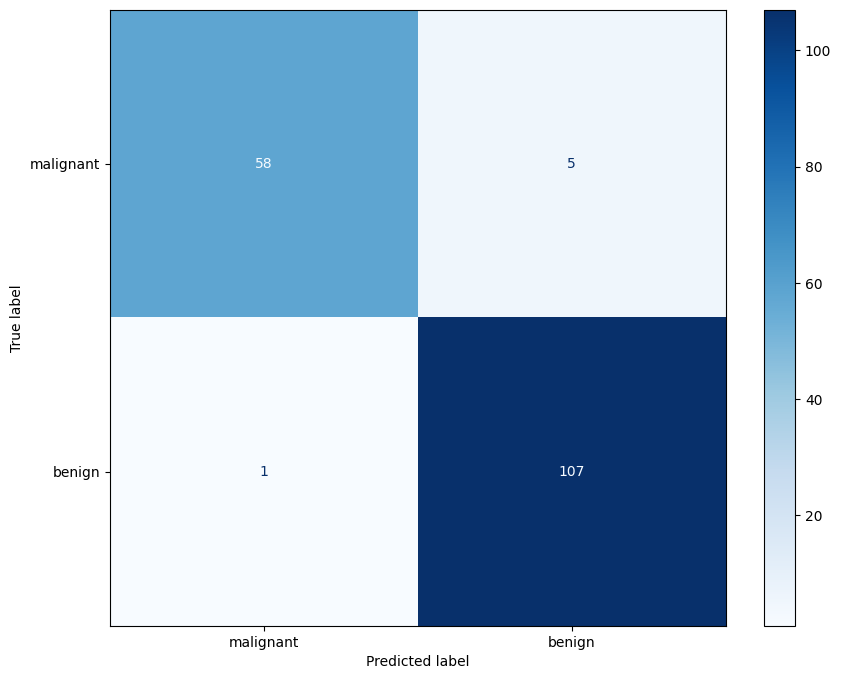

In [3]:
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

rf_predictions = rf_model.predict(X_test_cancer)
rf_accuracy = accuracy_score(y_test_cancer, rf_predictions)

# Test assertions
assert rf_accuracy > 0.90, f"Random Forest should achieve >90% accuracy, got {rf_accuracy:.3f}"
assert rf_model.n_estimators == 100, "Random Forest should have 100 estimators"

# Confusion matrix
fig, ax = plt.subplots(1, figsize=(10, 8))
_ = ConfusionMatrixDisplay.from_estimator(
    rf_model, 
    X_test_cancer, 
    y_test_cancer, 
    display_labels=cancer.target_names, 
    cmap=plt.cm.Blues,
    ax=ax
)

print(f"✓ Task 1 Complete - Random Forest accuracy: {rf_accuracy:.3f}")

## Task 2: Support Vector Machine

Train an SVM with RBF kernel on a non-linearly separable circles dataset and achieve >80% accuracy. Store the model in a variable named `svm_model`.

In [4]:
## Prerequisites for Task 2
from sklearn.svm import SVC

# Create non-linearly separable dataset (circles) and split into training and test sets
X_circles, y_circles = datasets.make_circles(n_samples=200, noise=0.1, factor=0.3, random_state=42)
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(
    X_circles, y_circles, test_size=0.3, random_state=42
)

In [ ]:
# Solution (put your code here)


,C,1
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


✓ Task 2 Complete - SVM accuracy: 1.000


/tmp/ipykernel_24832/2001837137.py:31: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


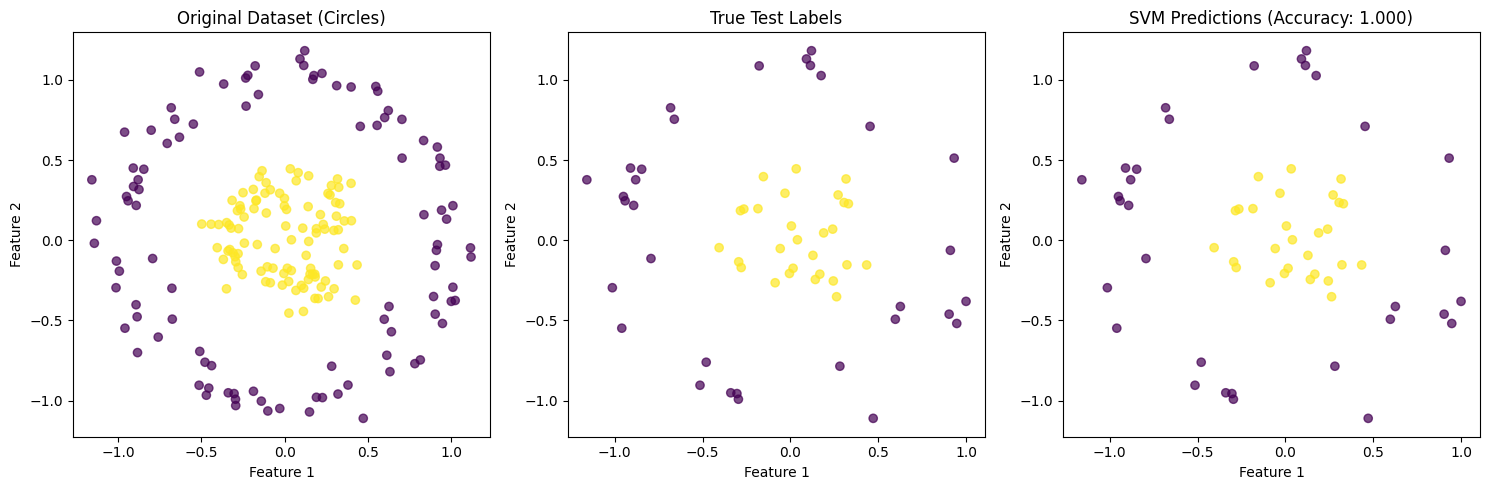

In [6]:
# Test and Visualization
svm_predictions = svm_model.predict(X_test_svm)
svm_accuracy = accuracy_score(y_test_svm, svm_predictions)

# Test assertions
assert svm_accuracy > 0.8, f"SVM should achieve >80% accuracy, got {svm_accuracy:.3f}"
assert svm_model.kernel == 'rbf', "SVM should use RBF kernel"

# Visualize dataset and predictions
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Original dataset
ax1.scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, cmap='viridis', alpha=0.7)
ax1.set_title('Original Dataset (Circles)')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

# True test labels
ax2.scatter(X_test_svm[:, 0], X_test_svm[:, 1], c=y_test_svm, cmap='viridis', alpha=0.7)
ax2.set_title('True Test Labels')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')

# SVM predictions
ax3.scatter(X_test_svm[:, 0], X_test_svm[:, 1], c=svm_predictions, cmap='viridis', alpha=0.7)
ax3.set_title(f'SVM Predictions (Accuracy: {svm_accuracy:.3f})')
ax3.set_xlabel('Feature 1')
ax3.set_ylabel('Feature 2')

fig.tight_layout()
fig.show()

print(f"✓ Task 2 Complete - SVM accuracy: {svm_accuracy:.3f}")

## Task 3: K-Means Clustering

Apply K-Means clustering with $k=4$ to discover patterns in unlabeled blob data and implement the elbow method. Store the model in a variable named `kmeans_model`.

In [7]:
## Prerequisites for Task 3
from sklearn.cluster import KMeans

# Create blob dataset for clustering
X_blobs, true_labels = datasets.make_blobs(
    n_samples=300, centers=4, cluster_std=0.8, random_state=42
)

In [ ]:
# Solution (put your code here)


✓ Task 3 Complete - K-Means with k=4, inertia: 362.5


/tmp/ipykernel_24832/232156465.py:31: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


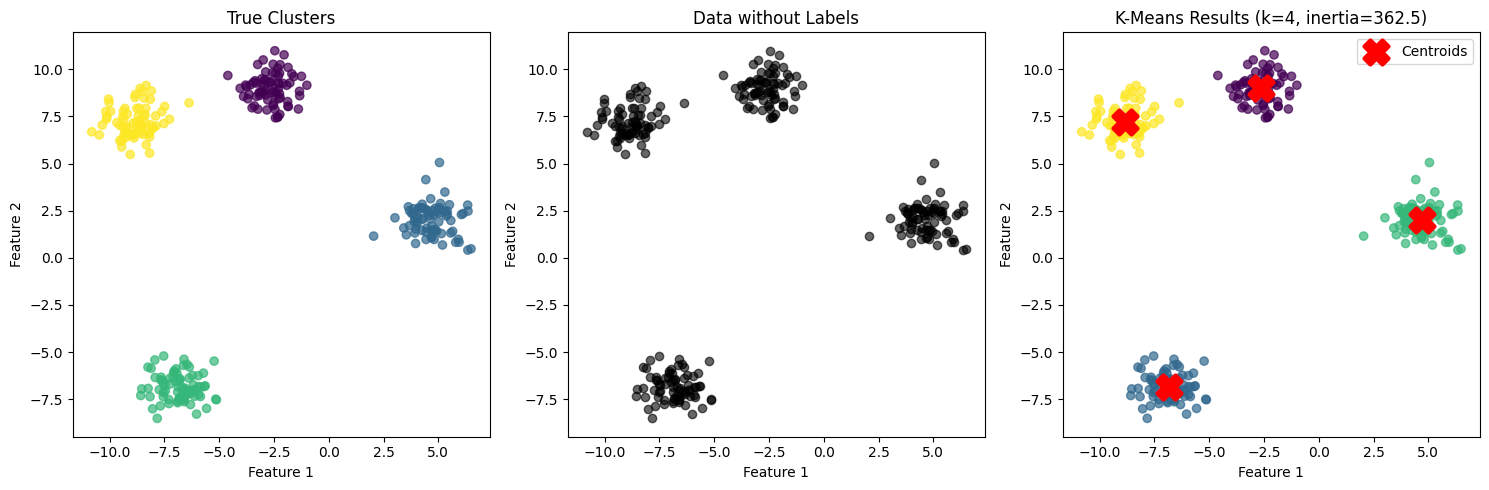

In [9]:
# Test and Visualization
# Test assertions
assert len(kmeans_model.cluster_centers_) == 4, "Should have 4 cluster centers"
assert len(set(cluster_labels)) <= 4, "Should have at most 4 unique labels" 

# Visualize results
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(15, 5))

# Original data with true clusters
ax1.scatter(X_blobs[:, 0], X_blobs[:, 1], c=true_labels, cmap='viridis', alpha=0.7)
ax1.set_title('True Clusters')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

# Data without labels
ax2.scatter(X_blobs[:, 0], X_blobs[:, 1], c='black', alpha=0.6)
ax2.set_title('Data without Labels')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')

# K-Means clustering results
ax3.scatter(X_blobs[:, 0], X_blobs[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
ax3.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], 
            marker='X', s=300, c='red', linewidths=3, label='Centroids')
ax3.set_title(f'K-Means Results (k=4, inertia={kmeans_model.inertia_:.1f})')
ax3.set_xlabel('Feature 1')
ax3.set_ylabel('Feature 2')
ax3.legend()

fig.tight_layout()
fig.show()

print(f"✓ Task 3 Complete - K-Means with k=4, inertia: {kmeans_model.inertia_:.1f}")

---

Lecture: AI I - Basics 

Exercise: [**Exercise 4.2: Machine Learning**](../exercises/02_machine_learning.ipynb)

Next: [**Solution 4.3: Evaluation with scikit-learn**](03_evaluation.ipynb)